# 야휴에서 삼성전자와 MS의 주가를 가져와서 한챠트에 누적수익율을 표시한다
- DataReader 를 통하여 주가 가져오는 방법
- Series 의 연산을 통하여 새로운 Series를 생성하고 챠트로 그려낸다.
- Series 의 shift, cumsum 메서드의 기능
- matplotlib 의 챠트에서 한글 안깨지게, 마이너스(-) 부호 표시 되게 하는 방법등.

In [2]:
import pandas_datareader.data as web
import pandas as pd
df_sec = web.DataReader('005930.KS', 'yahoo', start='2021-04-01', end='2021-10-31')
df_ms = web.DataReader('MSFT', 'yahoo', start='2021-04-01', end='2021-10-31')
df_sec.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-10-25,70600.0,69500.0,69900.0,70200.0,10029621.0,70200.0
2021-10-26,71500.0,70400.0,70600.0,71100.0,10528252.0,71100.0
2021-10-27,71000.0,70000.0,71000.0,70100.0,10295316.0,70100.0
2021-10-28,72200.0,69500.0,69500.0,70700.0,20644902.0,70700.0
2021-10-29,71600.0,69700.0,71200.0,69800.0,17016151.0,69800.0


In [3]:
df_ms.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-10-25,309.399994,306.459991,309.359985,308.130005,17554500.0,308.130005
2021-10-26,312.399994,308.600006,311.000000,310.109985,28107300.0,310.109985
2021-10-27,326.100006,316.000000,316.000000,323.170013,52588700.0,323.170013
2021-10-28,324.869995,321.359985,324.329987,324.350006,26297900.0,324.350006
2021-10-29,332.000000,323.899994,324.130005,331.619995,34744900.0,331.619995


In [8]:
df_sec['Close'].shift(1)

Date
2021-04-01        NaN
2021-04-02    82900.0
2021-04-05    84800.0
2021-04-06    85400.0
2021-04-07    86000.0
               ...   
2021-10-25    70400.0
2021-10-26    70200.0
2021-10-27    71100.0
2021-10-28    70100.0
2021-10-29    70700.0
Name: Close, Length: 144, dtype: float64

In [20]:
df_sec_dpc = (df_sec['Close'] / df_sec['Close'].shift(1)  -1)*100
df_sec_dpc_cs = df_sec_dpc.cumsum()

In [21]:
df_ms_dpc = (df_ms['Close']/df_ms['Close'].shift(1)-1)* 100
df_ms_dpc.iloc[0] = 0
df_ms_dpc_cs = df_ms_dpc.cumsum()

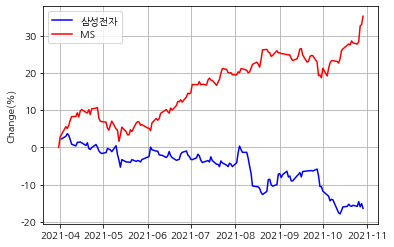

In [36]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False   # 마이너스 안깨지게 하는 기능
plt.rc('font', family='NanumGothic')         # 한글 안깨지게 하는 방법
plt.plot(df_sec.index, df_sec_dpc_cs,'b' ,label='삼성전자')
plt.plot(df_ms.index, df_ms_dpc_cs,'r',label ='MS')
plt.ylabel('Change(%)')
plt.grid(True)
plt.legend(loc= 'best')
plt.show()



In [ ]:
from matplotlib import font_manager as fm
for font in fm.fontManager.ttflist:
    # if 'Nanum' in font.name :
    print(font.name,font.fname)